# Predicting Housing Prices Using Neural Networks

This project will cover basics of regression using a neural network to predict housing prices, training on the Boston housing prices dataset

In [15]:
# https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb
# https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

## Using Tensorflow

In [1]:
"""
# We'll just import the boston housing dataset from sklearn.dataset
- Remember that the training data does not include the price 
"""

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import tensorflow as tf
import matplotlib.pyplot as plt

# loading in training data only 
boston_data = load_boston()
boston_df =pd.DataFrame(boston_data.data)
boston_df['PRICE'] = boston_data.target
boston_df.head()

tf.set_random_seed(1)

# here we convert the dataframe into numpy matrix and define the x, y data
boston_df_without_price = boston_df.drop(['PRICE'], axis=1)

training_boston_x= boston_df_without_price.values
training_boston_y = boston_df['PRICE'].values

C:\Users\Darshil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [246]:
# Lets set up the computation graph here

# inputs for A0
# X = tf.placeholder(tf.float32, shape = (506, 13))
# Y= tf.placeholder(tf.float32, shape = (506,))

X = tf.placeholder("float")
Y = tf.placeholder("float")
# weights for output layer
wL = tf.Variable(tf.random_normal([13,1]))
bL = tf.Variable(tf.random_normal([1,1]))

# Set up the linear model
prediction = tf.add(tf.matmul(X,wL), bL)

# Now lets set up a cost function- remember that this is a regression problem so we can use the mean squared error
# Also number of samples
n_samples = training_boston_x.shape[0]

# Mean squared error = sum(yhat - y)**2 / m,  cost is as follows:  
cost = tf.reduce_mean(tf.square(prediction-Y))

# Gradient descent
learning_rate = 0.05
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

lfp = []

with tf.Session() as sess:
    sess.run(init)    
    
#     Lets begin training    
    for epoch in range(1000):        
        _, loss = sess.run([optimizer,cost],  feed_dict = {X: training_boston_x, Y: training_boston_y})
        lfp.append(loss)

                                
#         if (epoch+1) % 100 == 0:        
#             c = sess.run(cost, feed_dict={X: training_boston_x, Y:training_boston_y})
#             print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(wL), "b=", sess.run(bL))
            
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: training_boston_x, Y: training_boston_y})
    print ("Training cost=", training_cost, "W=", sess.run(wL), "b=", sess.run(bL))
    

    """
    PREDICTION
    - Now we use the trained model to predict on some inputs
    - for now we'll just pick a row from the existing training data to make it work
    """    
    
    row = 18
    px = training_boston_x[row,:]
    py = training_boston_y[row]
    print ("The predicted value is: ", sess.run(prediction, feed_dict = {X: [px], Y: py }))   

Optimization Finished!
Training cost= 151.17615 W= [[ 1.08181596e-01]
 [-1.17458299e-01]
 [-1.87981236e+00]
 [ 3.17177629e+00]
 [-1.46679819e+00]
 [-2.96776503e-01]
 [ 1.10750474e-01]
 [-1.92724138e-01]
 [-1.69154310e+00]
 [ 1.18187368e-01]
 [ 5.22914529e-01]
 [-6.16591773e-04]
 [-6.81648701e-02]] b= [[-0.7991367]]
The predicted value is:  [[24.42299]]


# Graph the Loss Value  

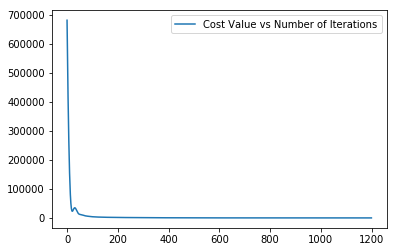

cost function ends at:  114.08734


In [245]:
plt.plot(lfp, '-', label='Cost Value vs Number of Iterations')
# plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()
%matplotlib inline

print ("cost function ends at: ", str(lfp[len(lfp)-1]))

In [240]:
boston_df.head(19)

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


## Using Keras
- We use keras so as to be able to save the model and use it inmy flask app at ease

In [25]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam, sgd

In [28]:
# A simple linear NN
from keras import optimizers


# Creating our DNN
model = Sequential([
    Dense(20,input_shape =(13,), activation = 'relu', kernel_initializer='normal'),    
    Dense(1, kernel_initializer='normal')
    ])
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(training_boston_x,training_boston_y,validation_split=0.001, epochs=100, shuffle=True, verbose=2, batch_size=10)    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Train on 505 samples, validate on 1 samples
Epoch 1/100
 - 0s - loss: 269.7821 - acc: 0.0059 - val_loss: 110.8396 - val_acc: 0.0000e+00
Epoch 2/100
 - 0s - loss: 94.6700 - acc: 0.0040 - val_loss: 126.2759 - val_acc: 0.0000e+00
Epoch 3/100
 - 0s - loss: 79.8211 - acc: 0.0198 - val_loss: 137.2144 - val_acc: 0.0000e+00
Epoch 4/100
 - 0s - loss: 70.7360 - acc: 0.0099 - val_loss: 125.4722 - val_acc: 0.0000e+00
Epoch 5/100
 - 0s - loss: 65.6463 - acc: 0.0079 - val_loss: 169.3752 - val_acc: 0.0000e+00
Epoch 6/100
 - 0s - loss: 62.9687 - acc:

Epoch 84/100
 - 0s - loss: 19.2443 - acc: 0.0158 - val_loss: 121.5010 - val_acc: 0.0000e+00
Epoch 85/100
 - 0s - loss: 19.2238 - acc: 0.0099 - val_loss: 147.9628 - val_acc: 0.0000e+00
Epoch 86/100
 - 0s - loss: 17.8783 - acc: 0.0158 - val_loss: 215.3450 - val_acc: 0.0000e+00
Epoch 87/100
 - 0s - loss: 18.1619 - acc: 0.0139 - val_loss: 189.9084 - val_acc: 0.0000e+00
Epoch 88/100
 - 0s - loss: 18.7671 - acc: 0.0178 - val_loss: 146.4711 - val_acc: 0.0000e+00
Epoch 89/100
 - 0s - loss: 19.1318 - acc: 0.0158 - val_loss: 171.6367 - val_acc: 0.0000e+00
Epoch 90/100
 - 0s - loss: 18.1661 - acc: 0.0079 - val_loss: 196.0828 - val_acc: 0.0000e+00
Epoch 91/100
 - 0s - loss: 18.7044 - acc: 0.0099 - val_loss: 151.0351 - val_acc: 0.0000e+00
Epoch 92/100
 - 0s - loss: 17.9758 - acc: 0.0158 - val_loss: 161.5811 - val_acc: 0.0000e+00
Epoch 93/100
 - 0s - loss: 17.5975 - acc: 0.0178 - val_loss: 157.4714 - val_acc: 0.0000e+00
Epoch 94/100
 - 0s - loss: 17.8484 - acc: 0.0158 - val_loss: 172.6120 - val_acc:

## Using Scikit Learn

In [3]:
from sklearn import linear_model

"""
Whats going on here: we multiply a 506,12 matrix with the coefficients/parameters of dimensions 13,1 to get y (506,1)
"""

# loading in training data only 
boston_data = load_boston()
boston_df =pd.DataFrame(boston_data.data)
boston_df['PRICE'] = boston_data.target
boston_df.head()

# here we convert the dataframe into numpy matrix and define the x, y data
boston_df_without_price = boston_df.drop(['PRICE'], axis=1)

training_boston_x= boston_df_without_price.values
training_boston_y = boston_df['PRICE'].values

In [6]:
#call model, fit and train
model = linear_model.LinearRegression()
model.fit(training_boston_x,training_boston_y)
model.predict([[2000,23232,2323,1212,344,566,555,8,9,10,1100,1200,2]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Saving the scikitlearn model using Joblib

In [20]:
#Now we save this model using joblib
from sklearn.externals import joblib
joblib.dump(model,'boston_housing_model')

['boston_housing_model']

In [31]:
#loading the model
mj = joblib.load('boston_housing_model')
mj.predict([[0.0005,10,3,0,0.65,7,50,5,2,290,15,300,5]])

array([27.66663278])

In [30]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Testing this section for flask deployement

In [2]:
"""
# We'll just import the boston housing dataset from sklearn.dataset
- Remember that the training data does not include the price 
"""

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

# loading in training data only 
boston_data = load_boston()
boston_df =pd.DataFrame(boston_data.data)
boston_df['PRICE'] = boston_data.target
boston_df.head()


# here we convert the dataframe into numpy matrix and define the x, y data
boston_df_without_price = boston_df.drop(['PRICE'], axis=1)

training_boston_x= boston_df_without_price.values
training_boston_y = boston_df['PRICE'].values

In [16]:
test_x = training_boston_x[:,0:2]
test_y = training_boston_y
test_x.shape

(506, 2)

In [23]:
import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, sgd

In [89]:
model = Sequential()
model.add(Dense(1, activation = 'relu', input_shape=(2,)))
model.summary()
model.compile(sgd(lr=0.01), loss = 'mse', metrics=['accuracy'])
model.fit(test_x,test_y, batch_size = 10,validation_split=0.02, epochs=40, shuffle=True, verbose=2)    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Train on 495 samples, validate on 11 samples
Epoch 1/40
 - 0s - loss: 596.3816 - acc: 0.0000e+00 - val_loss: 401.5873 - val_acc: 0.0000e+00
Epoch 2/40
 - 0s - loss: 596.3816 - acc: 0.0000e+00 - val_loss: 401.5873 - val_acc: 0.0000e+00
Epoch 3/40
 - 0s - loss: 596.3816 - acc: 0.0000e+00 - val_loss: 401.5873 - val_acc: 0.0000e+00
Epoch 4/40
 - 0s - loss: 596.3816 - acc: 0.0000e+00 - val_loss: 401.5873 - val_acc: 0.0000e+00
Epoch 5/40
 - 0s - loss: 596.3816 - acc: 0.0000e+00 - val_loss: 401.5873 - val_acc: 0.0000e+00
Epoch 6/40
 - 0s - loss: 596.3816 - acc: 0.0000e+00 - val_loss: 401.5873 - val_acc: 0.0000e+00
Epoch 7/40
 - 0s - loss: 596.3816 - acc: 0.0000e+00 - val_los

In [66]:
test = np.array([[1,2],
                 [2,3]]).reshape(2,2)
predictions = model.predict(test)
predictions

array([[0.],
       [0.]], dtype=float32)

In [67]:
model.save('C:/Users/Darshil/gitly/Deep-Learning/My Projects/test_boston.h5')

In [88]:
from keras.models import load_model

new_model = load_model('C:/Users/Darshil/gitly/Deep-Learning/My Projects/Flask_Keras/saved_models/test_boston.h5')
test = np.array([1222,4]).reshape(1,2)
pred = new_model.predict(test)
float(pred)

0.0

In [80]:
np.array(1,2)

TypeError: data type not understood